<a href="https://colab.research.google.com/github/dinasoffa/Unsubervised_ML/blob/main/K_means_Skratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib.colors import ListedColormap


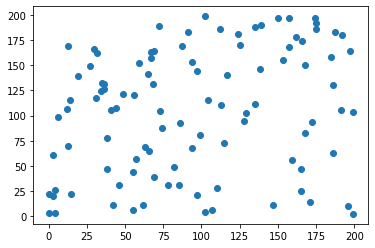

In [ ]:
df = np.random.randint(0,200,(100,2))
# data = np.random.normal(0,1,(100,2))
plt.scatter(df[:,0],df[:,1])
plt.show()

In [ ]:
df.shape

(100, 2)

In [ ]:
x=df[0]
y=df[1]

In [ ]:
len(df)

1797

In [ ]:
def euclidean(point, data):
    
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [ ]:
def k_mean(df,k,no_of_iteration):
  #initate the centroid
  centroids = []
  clusters_list=[]
  loss=[]
  for j in range(no_of_iteration):
    centroid=[random.choice(df) for _ in range(k)]
  #  for centroid in range(k):
   #     centroid = np.random.uniform(df)
    #    centroids.append(centroid)

    prev_centroids=None
    while np.not_equal(prev_centroids,centroid).any():    
      sorted_points=[[] for _ in range(k)]
      
      for x in df:
          dists = [ math.dist(x, c) for c in  centroid ]
          #dists=cdist(df, centroids ,'euclidean')
          #dists = euclidean(df, centroid)
          centroid_idx = np.argmin(dists)
          sorted_points[centroid_idx].append(x)

      prev_centroids = centroid.copy()
      # update of centroid
      centroid = [np.mean(cluster, axis=0) for cluster in sorted_points]
      for i, cen in enumerate(centroid):
          if np.isnan(cen).any():  # Catch any np.nans, resulting from a centroid having no points
              centroid[i] = prev_centroids[i]
      

    centroids.append(centroid)
    clusters_list.append(sorted_points) 


    sum_error = 0
    for i in range(k):
      sum_error += np.sum(np.sum((centroid[i] - sorted_points[i])**2, axis=1))

    j = 1/(len(df)) * sum_error
    loss.append(j)    



  min_index =  np.argmin(loss, axis=0)
  best_cen = centroids[min_index]
  best_clusters = clusters_list[min_index]
  best_loss = min(loss)

  return best_cen , best_clusters , best_loss 

In [ ]:
k_mean(df,3,10)

([array([156.15625, 152.5    ]),
  array([ 51.14705882, 132.08823529]),
  array([80.97058824, 32.17647059])],
 [[array([135, 112]),
   array([192, 180]),
   array([175, 192]),
   array([139, 190]),
   array([162, 178]),
   array([125, 170]),
   array([112, 186]),
   array([186,  63]),
   array([185, 158]),
   array([197, 164]),
   array([157, 168]),
   array([129, 103]),
   array([113, 111]),
   array([138, 146]),
   array([191, 106]),
   array([168, 150]),
   array([124, 181]),
   array([153, 155]),
   array([168,  83]),
   array([187, 183]),
   array([186, 130]),
   array([166, 174]),
   array([199, 104]),
   array([172,  94]),
   array([117, 140]),
   array([175, 186]),
   array([135, 188]),
   array([150, 197]),
   array([128,  95]),
   array([102, 199]),
   array([157, 197]),
   array([174, 197])],
  [array([ 68, 131]),
   array([ 36, 131]),
   array([13, 70]),
   array([ 35, 132]),
   array([ 19, 139]),
   array([ 31, 118]),
   array([ 27, 149]),
   array([ 91, 183]),
   array([ 

In [ ]:
best_cen , best_clusters , best_loss =k_mean(df,3,10)

In [ ]:
best_cen

[array([83.33333333, 31.3030303 ]),
 array([ 43.74193548, 127.61290323]),
 array([149.52777778, 152.11111111])]

In [ ]:
best_cen , best_clusters , best_loss =k_mean(df,3,10)

In [ ]:
loss_list = []
for k in range(3,16):
  best_cen , best_clusters , best_loss =k_mean(df,k,10)

  loss_list.append(best_loss)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
n=len(loss_list)
n

13

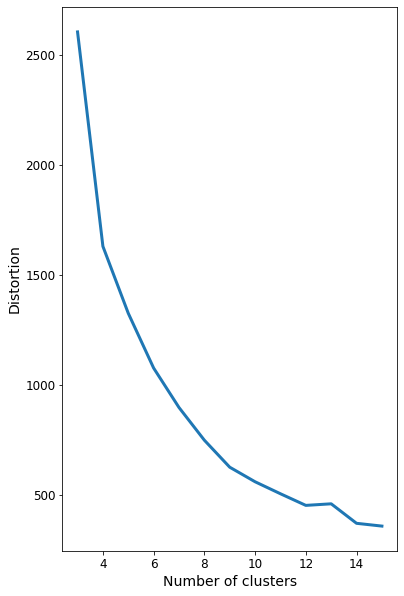

In [ ]:
n=len(loss_list)
fig, ax = plt.subplots(figsize=(6, 10))
plt.plot(range(3,n+3), loss_list, linewidth=3)
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Distortion', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

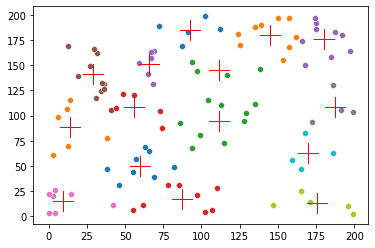

In [ ]:
for i in range(0,len(best_cen)):
  sns.scatterplot(x=[X[0] for X in best_clusters[i]],
                  y=[X[1] for X in best_clusters[i]]
                  )

  plt.plot([x for x, _ in best_cen],
          [y for _, y in best_cen],
          '+',
          color = 'r',
          markersize=20
          )
plt.show()